Name : Jainam Rajput

SAP-ID : 60009200022

Div/Batch : K/K1

In [113]:
import pandas as pd
import numpy as np
import csv
import random

In [114]:
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 

def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = random.randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
# Random Forest
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = random.randrange(len(dataset))
        sample.append(dataset[index])
    return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

In [115]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [116]:
filename = 'Datasets/sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(0, len(dataset[0])-1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(np.sqrt(len(dataset[0])-1))
n_trees = 3
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset,test_size=0.30)
yhat = random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features)

In [117]:
y = []
for item in test:
  y.append(item[-1])

In [118]:
print(accuracy_metric(y, yhat))

80.95238095238095


By Using Library

In [119]:
data = pd.read_csv('Datasets/sonar.all-data.csv')

In [120]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
ypred = rfc.predict(x_test)
print(f"Accuracy Of the Model On Test data is {accuracy_score(y_test,ypred)}")

Accuracy Of the Model On Test data is 0.8809523809523809


**Question 2 and 3**

In [127]:
df = pd.read_csv('Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [129]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
yhat = dt.predict(x_test)
yhat_train = dt.predict(x_train)

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [135]:
print(f"Accuracy Score Training is {accuracy_score(y_train,yhat_train)}")
print(f"Accuracy Score is {accuracy_score(y_test,yhat)}")

Accuracy Score Training is 1.0
Accuracy Score is 1.0


In [136]:
cm = confusion_matrix(y_test,yhat)

In [137]:
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [138]:
from sklearn import tree

[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'X[3] <= 2.35\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

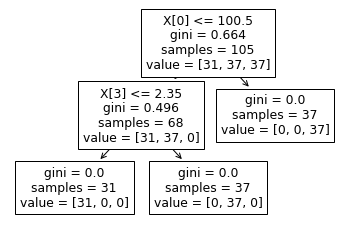

In [139]:
tree.plot_tree(dt)

In [140]:
DT_list = []
ac_list_test = []
ac_list_train = []

for i in range(1, 51):
  DTree = DecisionTreeClassifier(max_depth = i)
  DTree = DTree.fit(x_train, y_train)
  Yhat_Train_pred = DTree.predict(x_train)
  ac = accuracy_score(y_train, Yhat_Train_pred)
  Yhat_Test_pred = DTree.predict(x_test)
  ac_test = accuracy_score(y_test, Yhat_Test_pred)
  DT_list.append(DTree)
  ac_list_test.append(ac_test)
  ac_list_train.append(ac)

In [141]:
import matplotlib.pyplot as plt

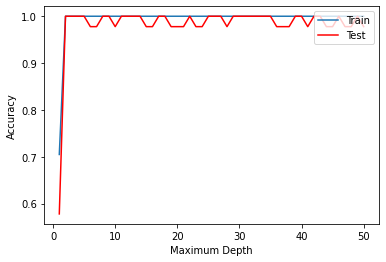

In [142]:
max_depth = list(range(1,51))
plt.plot(max_depth,ac_list_train,label="Train")
plt.plot(max_depth,ac_list_test,label="Test",color='r')
axis = plt.legend(loc='upper right')
plt.ylabel('Accuracy') 
plt.xlabel('Maximum Depth') 
plt.show()

  Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier()

In [145]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [146]:
yhat_rf = rf.predict(x_test)

In [147]:
print(f"Accuracy Score is {accuracy_score(y_test,yhat_rf)}")

Accuracy Score is 1.0


In [148]:
cm = confusion_matrix(y_test,yhat_rf)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [149]:
import seaborn as sns

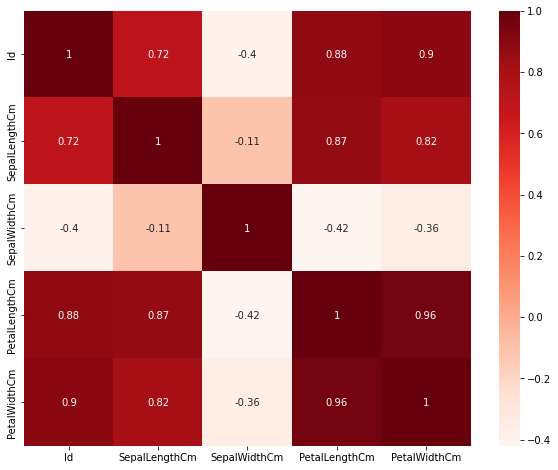

In [150]:
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [151]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
feature_imp = pd.Series(rf.feature_importances_,index=columns)
feature_imp.sort_values(ascending=False)

SepalLengthCm    0.435258
PetalWidthCm     0.275584
Species          0.214829
SepalWidthCm     0.050734
PetalLengthCm    0.023594
dtype: float64

Since by feature Importance we get know that the importance of SepalWidthCm and PetalLengthCm is low we drop both of them

In [152]:
df.drop(['SepalWidthCm','PetalLengthCm'],axis=1,inplace=True)
df

,Id,SepalLengthCm,PetalWidthCm,Species
0,1,5.1,0.2,Iris-setosa
1,2,4.9,0.2,Iris-setosa
2,3,4.7,0.2,Iris-setosa
3,4,4.6,0.2,Iris-setosa
4,5,5.0,0.2,Iris-setosa
...,...,...,...,...
145,146,6.7,2.3,Iris-virginica
146,147,6.3,1.9,Iris-virginica
147,148,6.5,2.0,Iris-virginica
148,149,6.2,2.3,Iris-virginica


In [153]:
x1 = df.iloc[:,:-1].values
y1 = df.iloc[:,-1].values.reshape(-1,1)

In [154]:
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1,test_size=0.30)

In [155]:
rf.fit(xtrain,ytrain)
yhat_rf1 = rf.predict(xtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [156]:
print(f"Accuracy Score is {accuracy_score(ytest,yhat_rf1)}")

Accuracy Score is 1.0
